# Fermipy Usage Statistics
This notebook polls the SAO/NASA Astrophysics Data System [(ADS)](https://ui.adsabs.harvard.edu/) to determine usage rates of the [Fermipy](https://fermipy.readthedocs.io/en/master/) python package.

## Setting up the API
In the fields below, `token` should be replaced with [your own API token](https://ui.adsabs.harvard.edu/user/settings/token). If you haven't worked with the ADS API before, it's recommended that you read the [README](https://github.com/adsabs/adsabs-dev-api/blob/master/README.md) before beginning. You may want to familiarize yourself with their other API Jupyter notebooks, especially the ones on [searching](https://github.com/adsabs/adsabs-dev-api/blob/master/Search_API.ipynb), [interacting with libraries](https://github.com/adsabs/adsabs-dev-api/blob/master/Libraries_API.ipynb), and [using the API with Python](https://github.com/adsabs/adsabs-dev-api/blob/master/Converting_curl_to_python.ipynb).

Note that much of the code in this notebook was adapted from the example notebook for [maintaining a mission bibliography](https://github.com/adsabs/adsabs-dev-api/blob/master/API_documentation_Python/API_examples/maintain_mission_bibliography.ipynb) on the ADS website.

In [27]:
# import the requests package and set your token in a variable for later use
import requests
import numpy as np
import matplotlib.pyplot as plt

token="i4bKvOj8azhzoZp1wi1eSV3B9BTuJQUhSo7qboHp"
base_url = "https://api.adsabs.harvard.edu/v1/search/query?"

The usage statistics are compiled in *very* simple fashion: count the number of refereed publications that reference 'Fermipy' in a given year vs. the number of publications that only reference the FermiTools (formerly ScienceTools). This will give us a rough lower bound for Fermipy usage amongst the community. If you were to enter the queries into the ADS online search, they would look like this:

query1 = 'pubdate:[2023-01 TO 2024-01] abs:fermi OR keyword:("gamma ray") body:(fermi AND (sciencetools OR fermitools) NOT fermipy) property:refereed'

query2 = 'pubdate:[2023-01 TO 2024-01] abs:fermi OR keyword:("gamma ray") body:(fermi AND fermipy) property:refereed'

After you enter those queries into the ADS search bar, you'll notice that the url changes to reflect the specfic paramters of your search. You'll want to copy everything after the "search/q=" part of these urls for use in the next step:

query1 = 'pubdate%3A%5B2023-01%20TO%202024-01%5D%20abs%3Afermi%20OR%20keyword%3A("gamma%20ray")%20body%3A(fermi%20AND%20(sciencetools%20OR%20fermitools)%20NOT%20fermipy)%20property%3Arefereed&sort=date%20desc%2C%20bibcode%20desc&p_=0'

query2 = 'pubdate%3A%5B2008-01%20TO%202009-01%5D%20abs%3Afermi%20OR%20keyword%3A("gamma%20ray")%20body%3A(fermi%20AND%20fermipy)%20property%3Arefereed&sort=date%20desc%2C%20bibcode%20desc&p_=0'

In [41]:
startYear = 2008
endYear = 2024

year = []
toolct = [] # array to store count of FermiTools-only papers
frmpyct = [] # attay to store count of fermipy papers
for i in range(startYear,endYear): 
    #This block gets the papers that do NOT use fermipy
    results = requests.get("https://api.adsabs.harvard.edu/v1/search/query?" \
                           'q=pubdate%3A%5B'+str(i)+'-01%20TO%20'+str(i+1)+'-01%5D%20abs%3Afermi%20OR%20keyword%3A("gamma%20ray")%20body%3A(fermi%20AND%20(sciencetools%20OR%20fermitools)%20NOT%20fermipy)%20property%3Arefereed&sort=date%20desc%2C%20bibcode%20desc' \
                           "&sort=date%20desc%2C%20bibcode%20desc" \
                           "&fl=bibcode,title" \
                           "&rows=500", \
                           headers={'Authorization': 'Bearer ' + token})
    res = results.json()['response']['docs']
    bibcodes = [d['bibcode'] for d in res]
    year.append(i)
    toolct.append(len(bibcodes))
    #print(str(i)+"-"+str(i+1)+":",str(len(bibcodes)))

    # This block gets the papers that DO use fermipy
    results2 = requests.get("https://api.adsabs.harvard.edu/v1/search/query?" \
                           'q=pubdate%3A%5B'+str(i)+'-01%20TO%20'+str(i+1)+'-01%5D%20abs%3Afermi%20OR%20keyword%3A("gamma%20ray")%20body%3A(fermi%20AND%20fermipy)%20property%3Arefereed&sort=date%20desc%2C%20bibcode%20desc' \
                           "&sort=date%20desc%2C%20bibcode%20desc" \
                           "&fl=bibcode,title" \
                           "&rows=500", \
                           headers={'Authorization': 'Bearer ' + token})
    res2 = results2.json()['response']['docs']
    bibcodes2 = [d['bibcode'] for d in res2]
    frmpyct.append(len(bibcodes2))
    print(str(i)+"-"+str(i+1)+":")
    print("  Fermitools: "+str(len(bibcodes)))
    print("  Fermipy: "+str(len(bibcodes2)))
    i+=1

2008-2009:
  Fermitools: 1
  Fermipy: 0
2009-2010:
  Fermitools: 8
  Fermipy: 0
2010-2011:
  Fermitools: 19
  Fermipy: 0
2011-2012:
  Fermitools: 20
  Fermipy: 0
2012-2013:
  Fermitools: 32
  Fermipy: 0
2013-2014:
  Fermitools: 24
  Fermipy: 0
2014-2015:
  Fermitools: 35
  Fermipy: 0
2015-2016:
  Fermitools: 49
  Fermipy: 0
2016-2017:
  Fermitools: 41
  Fermipy: 2
2017-2018:
  Fermitools: 36
  Fermipy: 8
2018-2019:
  Fermitools: 35
  Fermipy: 16
2019-2020:
  Fermitools: 42
  Fermipy: 27
2020-2021:
  Fermitools: 44
  Fermipy: 43
2021-2022:
  Fermitools: 46
  Fermipy: 52
2022-2023:
  Fermitools: 54
  Fermipy: 45
2023-2024:
  Fermitools: 62
  Fermipy: 69


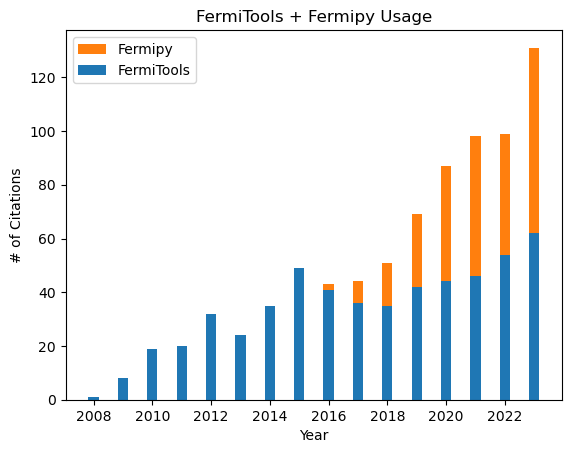

In [43]:
width = 0.35
p1 = plt.bar(year, toolct, width)
p2 = plt.bar(year, frmpyct, width, bottom=toolct)

plt.title('FermiTools + Fermipy Usage')
plt.ylabel('# of Citations')
plt.xlabel('Year')
plt.legend((p2[0], p1[0]), ('Fermipy', 'FermiTools'))

plt.show()

In [46]:
# What fraction of papers used fermipy since 2020?

print(sum(frmpyct[-4:])/(sum(toolct[-4:])+sum(frmpyct[-4:])))

0.5036144578313253


## Conclusion
Half of all published studies in the refereed literature since 2020 that analyse *Fermi/LAT* data utilize Fermipy.